---

# **Illustrative RFE with Linear Regression**

---
## **Simulated Data**

Simulated housing data, 5 variables: Size, Bedrooms, Floors, Age and Distance-to-City. Target variable is the Price.

### **Key Enhancements in the Code**

1. **Iteration Tracking**:
   - Each iteration of RFE is visualized with a scatter plot showing the actual vs. predicted values.
   - The title of each plot highlights the features being used in that iteration.

2. **Ranking History**:
   - Track how feature rankings change across iterations, which can be explained in class to emphasize the iterative nature of RFE.

3. **Final Model Visualization**:
   - The final model (with the top 3 features) is shown in a separate plot to compare how predictions improve as the feature set is optimized.

---

### **What We Will See**
1. Plots showing how well Linear Regression fits the data as features are progressively eliminated.
2. Insights into the trade-off between model simplicity and accuracy.
3. A deeper understanding of how RFE selects features and its impact on predictive performance.

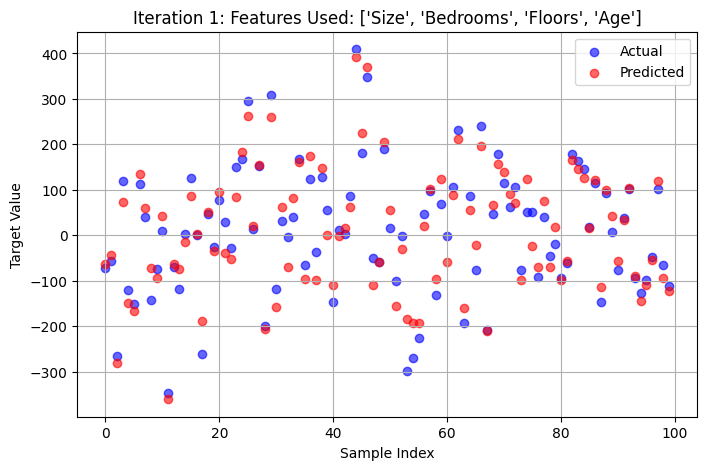

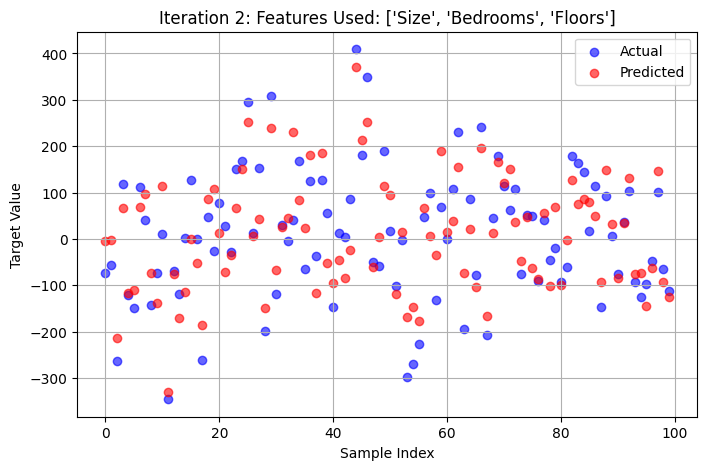

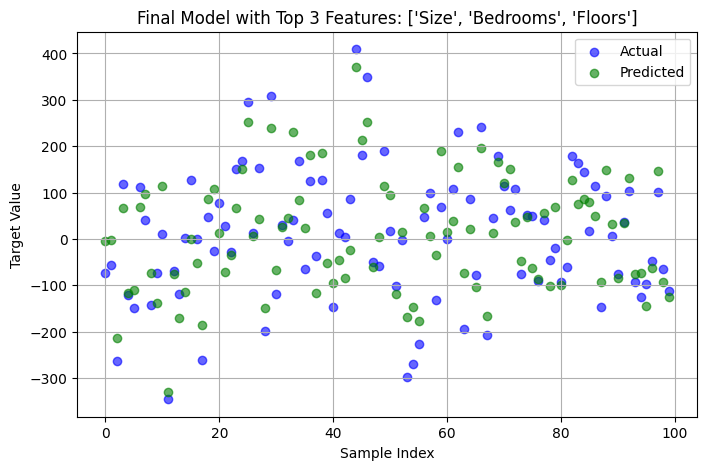

Final Selected Features and Coefficients:
Size: 65.3024
Bedrooms: 100.6226
Floors: 53.9377


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Step 1: Generate Synthetic Data
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
features = ['Size', 'Bedrooms', 'Floors', 'Age', 'Distance_to_City']
X = pd.DataFrame(X, columns=features)

# Step 2: Initialize Linear Regression Model
model = LinearRegression()

# Step 3: Perform RFE with Visualization of Each Iteration
n_features_to_select = 3
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)

# Track the ranking of features at each iteration
rank_history = []

# Track how the regression line fits over time
for i in range(len(features), n_features_to_select, -1):
    rfe = RFE(estimator=model, n_features_to_select=i - 1, step=1)
    rfe.fit(X, y)
    rank_history.append(rfe.ranking_)

    # Get features used in this iteration
    current_features = X.columns[rfe.support_]

    # Train and predict with the reduced feature set
    X_reduced = X[current_features]
    model.fit(X_reduced, y)
    y_pred = model.predict(X_reduced)

    # Plot the predictions vs actuals for this iteration
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(y)), y, color='blue', label='Actual', alpha=0.6)
    plt.scatter(range(len(y)), y_pred, color='red', label='Predicted', alpha=0.6)
    plt.title(f"Iteration {len(features) - i + 1}: Features Used: {list(current_features)}")
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid()
    plt.show()

# Final RFE for the top 3 features
rfe_final = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)
rfe_final.fit(X, y)
selected_features = X.columns[rfe_final.support_]
X_final = X[selected_features]
model.fit(X_final, y)

# Step 4: Final Plot of Selected Features
y_final_pred = model.predict(X_final)
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y)), y, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y)), y_final_pred, color='green', label='Predicted', alpha=0.6)
plt.title(f"Final Model with Top {n_features_to_select} Features: {list(selected_features)}")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid()
plt.show()

# Step 5: Display Final Selected Features and Coefficients
print("Final Selected Features and Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef:.4f}")

### **How to Measure Goodness of Model**

The **R² score** (also called the **coefficient of determination**) measures how well a regression model explains the variance of the dependent (target) variable. It provides an indication of the goodness of fit of the model. Here's its formal definition and explanation:

---

### **Definition**
The R² score is defined as:  

$
R^2 = 1 - \frac{SS_{\text{residual}}}{SS_{\text{total}}}
$

Where:
- $ SS_{\text{residual}} = \sum (y_i - \hat{y}_i)^2 $: Residual Sum of Squares (the total squared error between the true values $ y_i $ and predicted values $ \hat{y}_i $).
- $ SS_{\text{total}} = \sum (y_i - \bar{y})^2 $: Total Sum of Squares (the total squared deviation of the true values $ y_i $ from their mean $ \bar{y} $).

---

### **Interpretation**
1. **Range**:
   - $ R^2 $ ranges from $ -\infty $ to \( 1 \).
   - A value of \( 1 \): The model perfectly explains the variance in the data (ideal scenario).
   - A value of \( 0 \): The model explains none of the variance; predictions are no better than using the mean of the target variable.
   - A value less than \( 0 \): The model performs worse than a horizontal line predicting the mean of \( y \).

2. **Key Insight**:
   - $ R^2 $ represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model.
   - For example, an \( R^2 \) of \( 0.85 \) means the model explains 85% of the variance in the data, while the remaining 15% is unexplained.

---

### **How It's Used**
- **Goodness of Fit**: Used to evaluate the predictive power of a regression model.
- **Model Comparison**: Helps compare models—higher $ R^2 $ typically means a better model (but watch for overfitting).
- **Feature Selection**: Useful in RFE or other feature selection techniques to monitor the effect of adding/removing features.

---

### **Limitations**
1. **Doesn't Penalize Overfitting**:
   - A higher $ R^2 $ doesn't always mean a better model, as adding more features can artificially inflate $ R^2 $ without improving the model's generalization.
2. **Non-Linear Models**:
   - For non-linear relationships, $ R^2 $ might not provide a complete picture of model performance.
3. **Interpretability**:
   - $ R^2 $ doesn't reveal anything about the bias or variance of the model or whether predictions are reliable.

---

Iteration 1: Features Used: ['Size', 'Bedrooms', 'Floors', 'Age']
  MSE: 1274.8399, R²: 0.9345
Iteration 2: Features Used: ['Size', 'Bedrooms', 'Floors']
  MSE: 4592.3790, R²: 0.7641


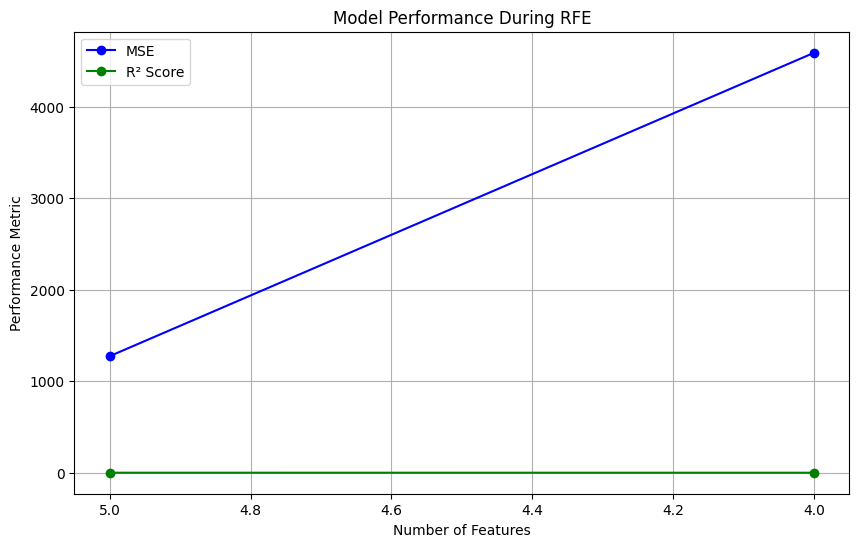


Final Selected Features and Coefficients:
Size: 65.3024
Bedrooms: 100.6226
Floors: 53.9377


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate Synthetic Data
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
features = ['Size', 'Bedrooms', 'Floors', 'Age', 'Distance_to_City']
X = pd.DataFrame(X, columns=features)

# Step 2: Initialize Linear Regression Model
model = LinearRegression()

# Step 3: Perform RFE with Performance Metrics
n_features_to_select = 3
mse_scores = []
r2_scores = []

# Perform RFE iteratively and track performance
for i in range(len(features), n_features_to_select, -1):
    rfe = RFE(estimator=model, n_features_to_select=i - 1, step=1)
    rfe.fit(X, y)

    # Get features used in this iteration
    current_features = X.columns[rfe.support_]

    # Train and predict with the reduced feature set
    X_reduced = X[current_features]
    model.fit(X_reduced, y)
    y_pred = model.predict(X_reduced)

    # Calculate performance metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)

    # Log iteration details
    print(f"Iteration {len(features) - i + 1}: Features Used: {list(current_features)}")
    print(f"  MSE: {mse:.4f}, R²: {r2:.4f}")

# Final RFE for the top 3 features
rfe_final = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)
rfe_final.fit(X, y)
selected_features = X.columns[rfe_final.support_]
X_final = X[selected_features]
model.fit(X_final, y)
y_final_pred = model.predict(X_final)

# Step 4: Plot Performance Metrics Over Iterations
plt.figure(figsize=(10, 6))
iterations = range(len(features), n_features_to_select, -1)
plt.plot(iterations, mse_scores, marker='o', label='MSE', color='blue')
plt.plot(iterations, r2_scores, marker='o', label='R² Score', color='green')
plt.title("Model Performance During RFE")
plt.xlabel("Number of Features")
plt.ylabel("Performance Metric")
plt.gca().invert_xaxis()  # Reverse x-axis to show decreasing features
plt.legend()
plt.grid()
plt.show()

# Step 5: Display Final Selected Features and Coefficients
print("\nFinal Selected Features and Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef:.4f}")


### **Use \$R^2\$ During RFE**

---

Now that we know how to measure the **Goodness** of the model while eliminating features of dataset. We can use that to evaluate the performance of the RFE process in each iteration.

Full Model Metrics:
MSE: 102.66, R²: 1.00
Optimal number of features: 10

Reduced Model Metrics:
MSE: 102.66, R²: 1.00

Comparison:
Full Model -> Features: 10, MSE: 102.66, R²: 1.00
Reduced Model -> Features: 10, MSE: 102.66, R²: 1.00


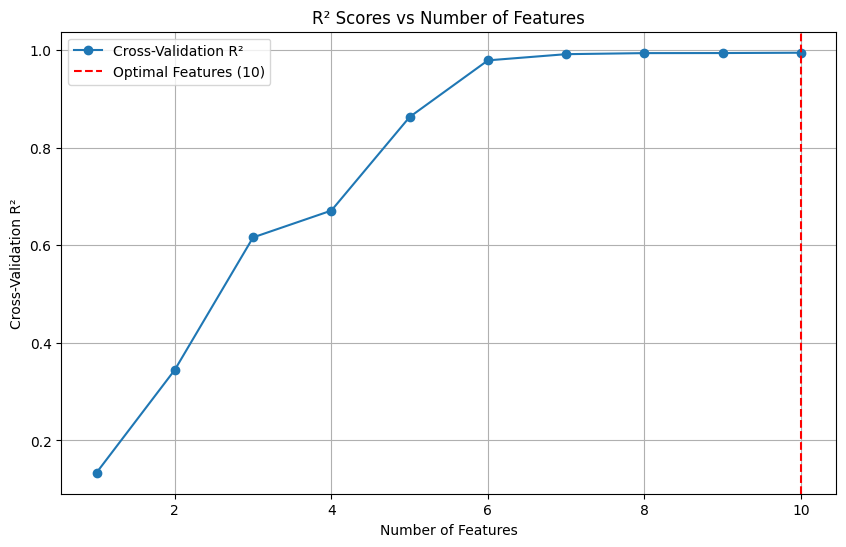

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df["Target"] = y

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Full Model
full_model = LinearRegression()
full_model.fit(X_train, y_train)
full_pred = full_model.predict(X_test)

# Metrics for Full Model
full_mse = mean_squared_error(y_test, full_pred)
full_r2 = r2_score(y_test, full_pred)
print("Full Model Metrics:")
print(f"MSE: {full_mse:.2f}, R²: {full_r2:.2f}")

# Recursive Feature Elimination (RFE) with Cross-Validation
cv_scores = []
num_features = []

for k in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=k)
    rfe.fit(X_train, y_train)
    
    # Cross-validation to assess performance
    scores = cross_val_score(rfe, X_train, y_train, scoring='r2', cv=5)
    cv_scores.append(scores.mean())
    num_features.append(k)

# Find the optimal number of features
optimal_features = num_features[np.argmax(cv_scores)]
print(f"Optimal number of features: {optimal_features}")

# Train Final Model with Optimal Features
rfe = RFE(estimator=LinearRegression(), n_features_to_select=optimal_features)
rfe.fit(X_train, y_train)

# Reduced Model
X_train_reduced = X_train[:, rfe.support_]
X_test_reduced = X_test[:, rfe.support_]

reduced_model = LinearRegression()
reduced_model.fit(X_train_reduced, y_train)
reduced_pred = reduced_model.predict(X_test_reduced)

# Metrics for Reduced Model
reduced_mse = mean_squared_error(y_test, reduced_pred)
reduced_r2 = r2_score(y_test, reduced_pred)
print("\nReduced Model Metrics:")
print(f"MSE: {reduced_mse:.2f}, R²: {reduced_r2:.2f}")

# Compare Full Model vs Reduced Model
print("\nComparison:")
print(f"Full Model -> Features: {X.shape[1]}, MSE: {full_mse:.2f}, R²: {full_r2:.2f}")
print(f"Reduced Model -> Features: {optimal_features}, MSE: {reduced_mse:.2f}, R²: {reduced_r2:.2f}")

# Visualize Cross-Validation Scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(num_features, cv_scores, marker='o', label='Cross-Validation R²')
plt.axvline(optimal_features, color='red', linestyle='--', label=f'Optimal Features ({optimal_features})')
plt.title("R² Scores vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validation R²")
plt.legend()
plt.grid()
plt.show()


## California Housing Dataset

---

Let's practice RFE on a real dataset. Boston Housing Dataset is not available due to concerns on ethic issues - We will discuss that in the future. We use an alternative dataset.

Improving on top of the above, the following is to test if the R^2 score reached some kind of plataue for us to decide we have now obtained enough important features. It shows that feature 4-8 is not contributing much to the model performance and they can be eliminated.

The following also shows the coefficients of feature upon each round (elimination)

---

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Fetch California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initial Linear Regression with all features
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Print initial feature coefficients
print("Initial Linear Regression Coefficients:")
for feature, coef in zip(california.feature_names, lr.coef_):
    print(f"{feature}: {coef:.4f}")

# Perform Recursive Feature Elimination
def perform_rfe_iteration(n_features_to_select):
    rfe = RFE(estimator=lr, n_features_to_select=n_features_to_select)
    rfe.fit(X_train_scaled, y_train)
    
    # Get selected features
    selected_features = X.columns[rfe.support_]
    eliminated_features = X.columns[~rfe.support_]
    
    # Fit linear regression on selected features
    X_train_selected = X_train_scaled[:, rfe.support_]
    X_test_selected = X_test_scaled[:, rfe.support_]
    
    lr_selected = LinearRegression()
    lr_selected.fit(X_train_selected, y_train)
    
    print(f"\n--- RFE with {n_features_to_select} features ---")
    print("Eliminated Features:", list(eliminated_features))
    print("\nSelected Features Coefficients:")
    for feature, coef in zip(selected_features, lr_selected.coef_):
        print(f"{feature}: {coef:.4f}")
    
    # Calculate and print R-squared
    train_score = lr_selected.score(X_train_selected, y_train)
    test_score = lr_selected.score(X_test_selected, y_test)
    print(f"\nTrain R-squared: {train_score:.4f}")
    print(f"Test R-squared: {test_score:.4f}")

# Perform RFE iterations
perform_rfe_iteration(5)  # Select top 5 features
perform_rfe_iteration(3)  # Select top 3 features

Initial Linear Regression Coefficients:
MedInc: 0.8544
HouseAge: 0.1225
AveRooms: -0.2944
AveBedrms: 0.3393
Population: -0.0023
AveOccup: -0.0408
Latitude: -0.8969
Longitude: -0.8698

--- RFE with 5 features ---
Eliminated Features: ['HouseAge', 'Population', 'AveOccup']

Selected Features Coefficients:
MedInc: 0.8319
AveRooms: -0.2994
AveBedrms: 0.3394
Latitude: -0.9846
Longitude: -0.9641

Train R-squared: 0.6012
Test R-squared: 0.5675

--- RFE with 3 features ---
Eliminated Features: ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

Selected Features Coefficients:
MedInc: 0.7025
Latitude: -1.0321
Longitude: -0.9958

Train R-squared: 0.5872
Test R-squared: 0.5721


### RFE Internal

---

Let's see internally how **one round** of RFE works on feature elimination.
- Use linear regression library code (its model and fit operation)
- Implement RFE process in CustomREF
- Track Eliminated features and Remaining features
- Keep the coefficients each iteration in a 2D table so that we can analysis later
- Assume this round of RFE picks **3** most important features

---

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

class CustomRFE:
    def __init__(self, estimator, n_features_to_select):
        self.estimator = estimator
        self.n_features_to_select = n_features_to_select
        self.coefficient_history = []
        self.eliminated_features = []

    def fit(self, X, y, feature_names):
        X_current = X.copy()
        features_remaining = list(range(X.shape[1]))
        
        while len(features_remaining) > self.n_features_to_select:
            # Fit linear regression
            self.estimator.fit(X_current, y)
            
            # Record current coefficients
            current_coefs = np.zeros(len(feature_names))
            current_coefs[features_remaining] = self.estimator.coef_
            self.coefficient_history.append(current_coefs)
            
            # Get absolute coefficient values for remaining features
            coef_abs = np.abs(self.estimator.coef_)
            
            # Find the feature with smallest absolute coefficient
            min_coef_idx = np.argmin(coef_abs)
            eliminated_feature_idx = features_remaining[min_coef_idx]
            
            # Track eliminated feature
            self.eliminated_features.append(feature_names[eliminated_feature_idx])
            
            # Remove the feature with smallest coefficient
            features_remaining.pop(min_coef_idx)
            X_current = X[:, features_remaining]
        
        return self

# Fetch and prepare data
california = fetch_california_housing()
X = california.data
feature_names = california.feature_names
y = california.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform custom RFE
lr = LinearRegression()
custom_rfe = CustomRFE(lr, n_features_to_select=3)
custom_rfe.fit(X_scaled, y, feature_names)

# Create coefficient history DataFrame
coef_df = pd.DataFrame(
    custom_rfe.coefficient_history, 
    columns=feature_names
)

# Highlight eliminated features in each iteration
print("Coefficient Values Across RFE Iterations:")
print(coef_df.round(4))

print("\nEliminated Features Order:")
for i, feature in enumerate(custom_rfe.eliminated_features, 1):
    print(f"Iteration {i}: {feature}")

Coefficient Values Across RFE Iterations:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.8296    0.1188   -0.2655     0.3057     -0.0045   -0.0393   -0.8999   
1  0.8297    0.1203   -0.2651     0.3056      0.0000   -0.0397   -0.8986   
2  0.8275    0.1194   -0.2622     0.3035      0.0000    0.0000   -0.9022   
3  0.8095    0.0000   -0.2735     0.3096      0.0000    0.0000   -0.9842   
4  0.6970    0.0000    0.0000     0.0785      0.0000    0.0000   -1.0789   

   Longitude  
0    -0.8705  
1    -0.8696  
2    -0.8731  
3    -0.9625  
4    -1.0411  

Eliminated Features Order:
Iteration 1: Population
Iteration 2: AveOccup
Iteration 3: HouseAge
Iteration 4: AveRooms
Iteration 5: AveBedrms
